<a href="https://colab.research.google.com/github/Jigyass/Data-Privacy-and-Data-Security-Models/blob/main/Laplace_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/Data_Privacy_and_Data_Security/adult.zip

Archive:  /content/drive/MyDrive/Data_Privacy_and_Data_Security/adult.zip
  inflating: Index                   
  inflating: adult.data              
  inflating: adult.names             
  inflating: adult.test              
  inflating: old.adult.names         


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [6]:
df = pd.read_csv('adult.data')

In [8]:
df.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-Num', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-Gain', 'Capital-Loss', 'Hours-Per-Week', 'Native-Country', 'Income']

In [11]:
#Create Modified datasets for each purpose

oldest_removed = df[df['Age'] != df['Age'].max()]
age_26_removed = df[df['Age'] != 26]
youngest_removed = df[df['Age'] != df['Age'].min()]

In [28]:
#Calculate the sensitivity of the dataset
sensitivity = 1

In [29]:
#Function to add Laplacian noise
def laplace_noise(sensitivity, epsilon):
    return np.random.laplace(loc=0, scale=sensitivity / epsilon)

In [30]:
def average_age_query(df, epsilon):
    query_result = df[df['Age'] > 25]['Age'].mean()
    noise = laplace_noise(sensitivity, epsilon)
    return query_result + noise

In [31]:
#Since we are given epsilon value as 5 and the number of random results, lets put those values as constants
epsilon = 0.5
num_trials = 1000

In [32]:
#Create 4 groups of modified dataset according to the question
#Group 1: Original dataset
original_results = [average_age_query(df, epsilon) for _ in range(num_trials)]

#Group 2: Dataset with oldest age removed
oldest_removed_results = [average_age_query(oldest_removed, epsilon) for _ in range(num_trials)]

#Group 3: Dataset with any record of age 26 removed
age_26_removed_results = [average_age_query(age_26_removed, epsilon) for _ in range(num_trials)]

#Group 4: Dataset with youngest age removed
youngest_removed_results = [average_age_query(youngest_removed, epsilon) for _ in range(num_trials)]

In [33]:
# Round the results to two decimal places
original_results_rounded = [round(x, 2) for x in original_results]
oldest_removed_results_rounded = [round(x, 2) for x in oldest_removed_results]
age_26_removed_results_rounded = [round(x, 2) for x in age_26_removed_results]
youngest_removed_results_rounded = [round(x, 2) for x in youngest_removed_results]

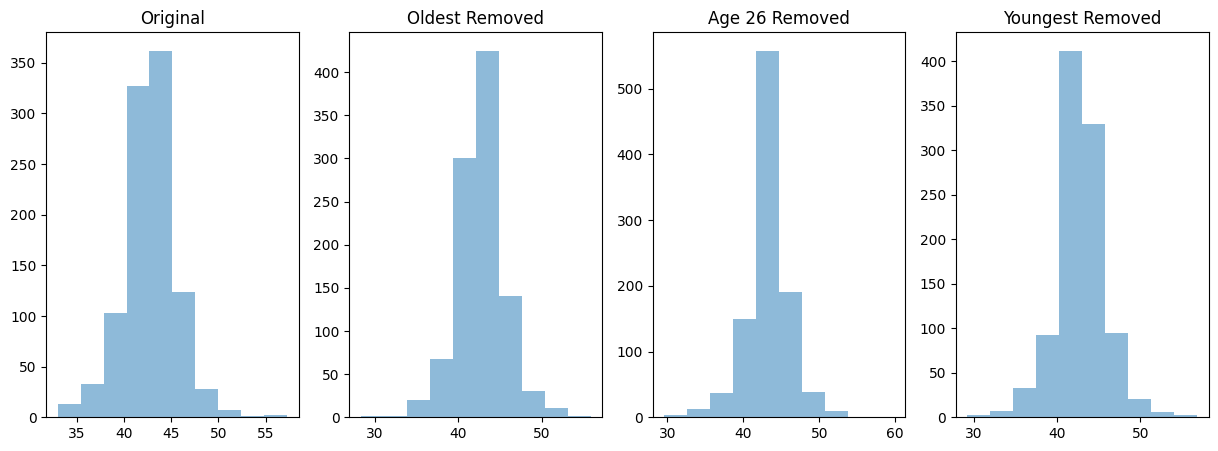

In [38]:
#Use frequency distribution to validate data
plt.figure(figsize=[15, 5])

plt.subplot(1, 4, 1)
plt.hist(original_results, alpha=0.5, label='Original')
plt.title('Original')

plt.subplot(1, 4, 2)
plt.hist(oldest_removed_results, alpha=0.5, label='Oldest Removed')
plt.title('Oldest Removed')

plt.subplot(1, 4, 3)
plt.hist(age_26_removed_results, alpha=0.5, label='Age 26 Removed')
plt.title('Age 26 Removed')

plt.subplot(1, 4, 4)
plt.hist(youngest_removed_results, alpha=0.5, label='Youngest Removed')
plt.title('Youngest Removed')

plt.show()


In [37]:
# Initialize variables
epsilon = 1
num_trials = 1000

# Create empty lists to store the results
original_results_eps1 = []
oldest_removed_results_eps1 = []
age_26_removed_results_eps1 = []
youngest_removed_results_eps1 = []

# Original Dataset
for i in range(num_trials):
    result = average_age_query(df, epsilon)
    original_results_eps1.append(round(result, 2))

# Dataset with oldest Age removed
oldest_removed = df[df['Age'] != df['Age'].max()]
for i in range(num_trials):
    result = average_age_query(oldest_removed, epsilon)
    oldest_removed_results_eps1.append(round(result, 2))

# Dataset with any record of Age 26 removed
age_26_removed = df[df['Age'] != 26]
for i in range(num_trials):
    result = average_age_query(age_26_removed, epsilon)
    age_26_removed_results_eps1.append(round(result, 2))

# Dataset with youngest Age removed
youngest_removed = df[df['Age'] != df['Age'].min()]
for i in range(num_trials):
    result = average_age_query(youngest_removed, epsilon)
    youngest_removed_results_eps1.append(round(result, 2))

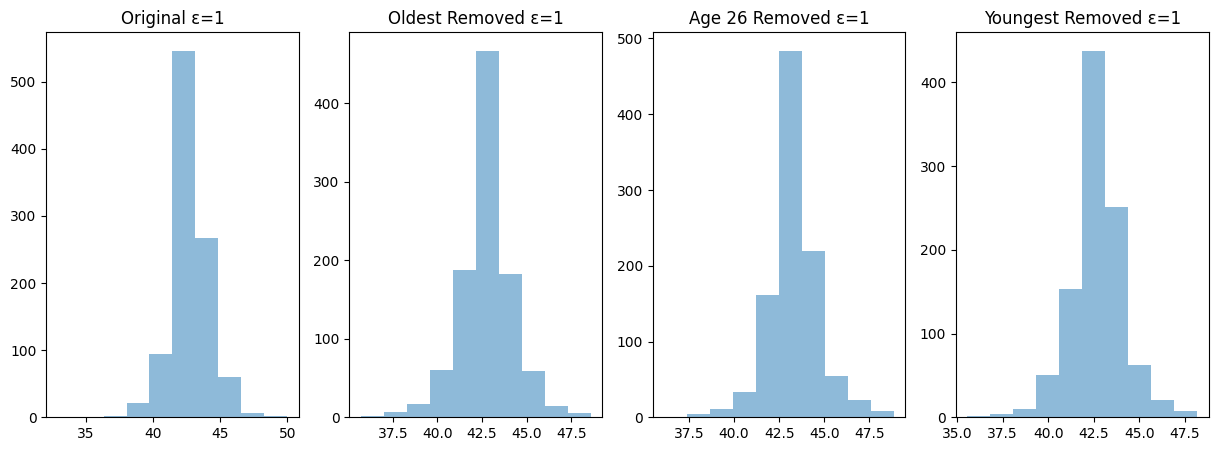

In [39]:
plt.figure(figsize=[15, 5])

# Original Dataset for ε = 1
plt.subplot(1, 4, 1)
plt.hist(original_results_eps1, alpha=0.5, label='Original ε=1')
plt.title('Original ε=1')

# Dataset with oldest Age removed for ε = 1
plt.subplot(1, 4, 2)
plt.hist(oldest_removed_results_eps1, alpha=0.5, label='Oldest Removed ε=1')
plt.title('Oldest Removed ε=1')

# Dataset with any record of Age 26 removed for ε = 1
plt.subplot(1, 4, 3)
plt.hist(age_26_removed_results_eps1, alpha=0.5, label='Age 26 Removed ε=1')
plt.title('Age 26 Removed ε=1')

# Dataset with youngest Age removed for ε = 1
plt.subplot(1, 4, 4)
plt.hist(youngest_removed_results_eps1, alpha=0.5, label='Youngest Removed ε=1')
plt.title('Youngest Removed ε=1')

plt.show()

Distance between original_results and oldest_removed_results: 0.1073807913047915
Distance between original_results and age_26_removed_results: 0.5225132583764207
Distance between original_results and youngest_removed_results: 0.08084775535929367
Distance between original_results and original_results_eps1: 0.04888730185880519
Distance between original_results and oldest_removed_results_eps1: 0.001547301858799699
Distance between original_results and age_26_removed_results_eps1: 0.5695373018588015
Distance between original_results and youngest_removed_results_eps1: 0.043612698141203055
Distance between oldest_removed_results and age_26_removed_results: 0.6298940496812122
Distance between oldest_removed_results and youngest_removed_results: 0.18822854666408517
Distance between oldest_removed_results and original_results_eps1: 0.1562680931635967
Distance between oldest_removed_results and oldest_removed_results_eps1: 0.1089280931635912
Distance between oldest_removed_results and age_26_rem

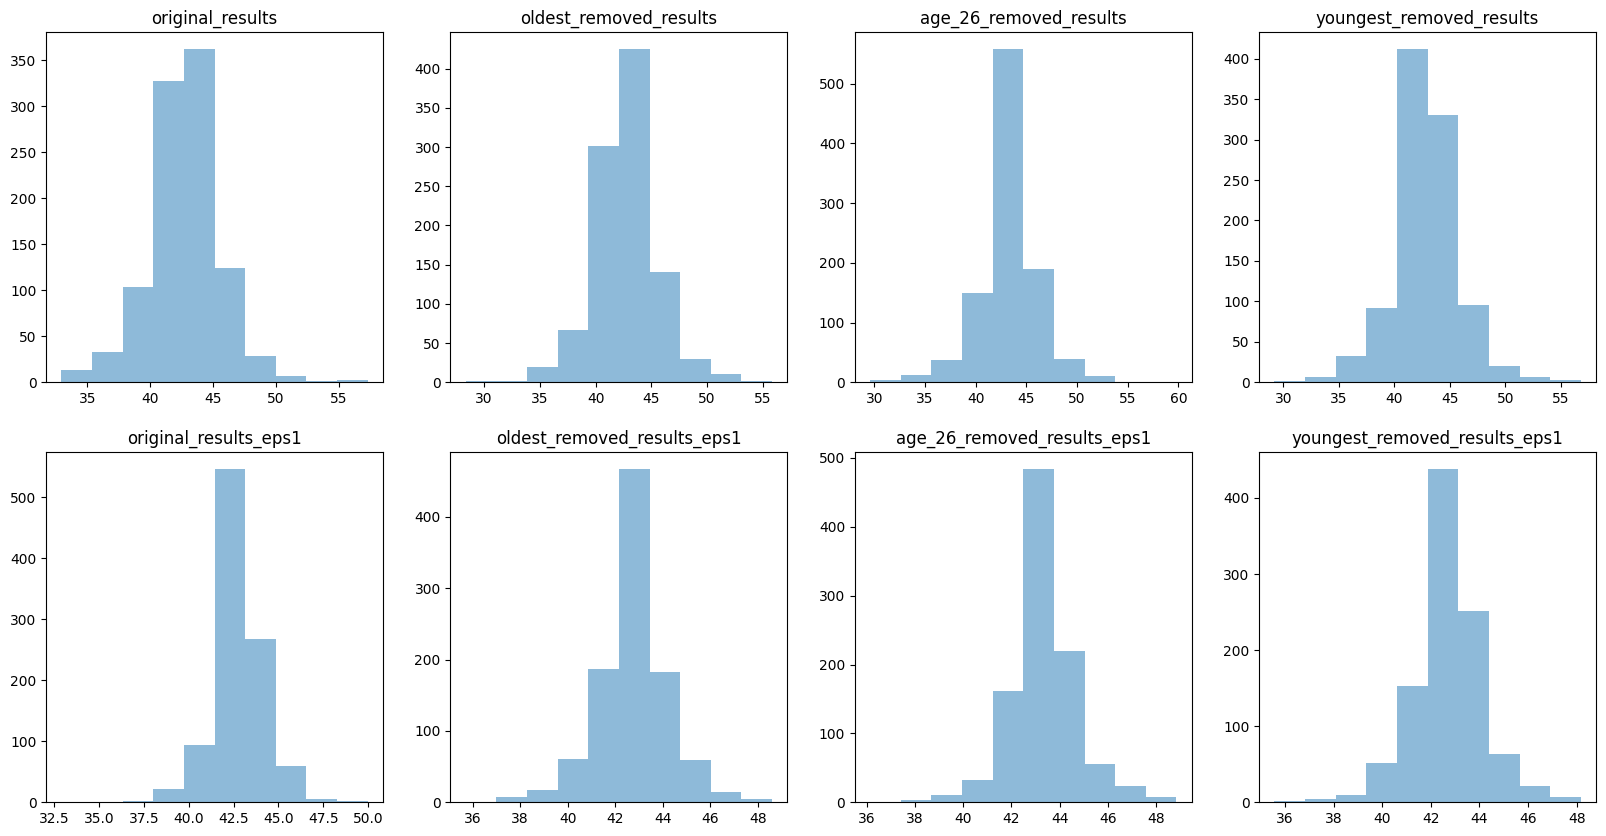

In [42]:
# Groups for easier iteration
groups = {
    'original_results': original_results,
    'oldest_removed_results': oldest_removed_results,
    'age_26_removed_results': age_26_removed_results,
    'youngest_removed_results': youngest_removed_results,
    'original_results_eps1': original_results_eps1,
    'oldest_removed_results_eps1': oldest_removed_results_eps1,
    'age_26_removed_results_eps1': age_26_removed_results_eps1,
    'youngest_removed_results_eps1': youngest_removed_results_eps1
}

# To track comparisons already made
already_compared = set()

# Calculate pairwise distances (mean difference)
for name1, data1 in groups.items():
    for name2, data2 in groups.items():
        if name1 != name2 and (name2, name1) not in already_compared:
            distance = np.abs(np.mean(data1) - np.mean(data2))
            print(f"Distance between {name1} and {name2}: {distance}")
            already_compared.add((name1, name2))

# Calculate variance for each group
for name, data in groups.items():
    variance = np.var(data)
    print(f"Variance of {name}: {variance}")

# Visualize the data
plt.figure(figsize=[20, 10])
for i, (name, data) in enumerate(groups.items()):
    plt.subplot(2, 4, i+1)
    plt.hist(data, alpha=0.5, label=name)
    plt.title(name)

plt.show()

In [44]:
# Create DataFrames from each group of results (assuming these are lists of numbers)
df_original = pd.DataFrame({'Result': original_results, 'Group': 'original_results'})
df_oldest_removed = pd.DataFrame({'Result': oldest_removed_results, 'Group': 'oldest_removed_results'})
df_age_26_removed = pd.DataFrame({'Result': age_26_removed_results, 'Group': 'age_26_removed_results'})
df_youngest_removed = pd.DataFrame({'Result': youngest_removed_results, 'Group': 'youngest_removed_results'})

df_original_eps1 = pd.DataFrame({'Result': original_results_eps1, 'Group': 'original_results_eps1'})
df_oldest_removed_eps1 = pd.DataFrame({'Result': oldest_removed_results_eps1, 'Group': 'oldest_removed_results_eps1'})
df_age_26_removed_eps1 = pd.DataFrame({'Result': age_26_removed_results_eps1, 'Group': 'age_26_removed_results_eps1'})
df_youngest_removed_eps1 = pd.DataFrame({'Result': youngest_removed_results_eps1, 'Group': 'youngest_removed_results_eps1'})

# Concatenate all the DataFrames into one
df_all = pd.concat([df_original, df_oldest_removed, df_age_26_removed, df_youngest_removed,
                    df_original_eps1, df_oldest_removed_eps1, df_age_26_removed_eps1, df_youngest_removed_eps1])

# Save the combined DataFrame to a CSV file
df_all.to_csv('all_results.csv', index=False)